# Implementation of Linear Regression with and without SkLearn

### First let us import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

### Import the data we are going to work with.

In [2]:
data = pd.read_csv('LengthOfStay.csv')

Since only limited columns are displayed we will set it to None, so that there is no limit in the number of columns displayed.

In [3]:
pd.set_option('display.max_columns', None)

So let us take a look at our data and see if we need to make any changes so that it fits our Linear Regression model.

In [4]:
data.head()

,eid,vdate,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,fibrosisandother,malnutrition,hemo,hematocrit,neutrophils,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,discharged,facid,lengthofstay
0,1,8/29/2012,0,F,0,0,0,0,0,0,0,0,0,0,0,11.5,14.20,140.361132,192.476918,12.0,1.390722,30.432418,96,6.5,4,9/1/2012,B,3
1,2,5/26/2012,5+,F,0,0,0,0,0,0,0,0,0,0,0,9.0,4.10,136.731692,94.078507,8.0,0.943164,28.460516,61,6.5,1,6/2/2012,A,7
2,3,9/22/2012,1,F,0,0,0,0,0,0,0,0,0,0,0,8.4,8.90,133.058514,130.530524,12.0,1.065750,28.843812,64,6.5,2,9/25/2012,B,3
3,4,8/9/2012,0,F,0,0,0,0,0,0,0,0,0,0,0,11.9,9.40,138.994023,163.377028,12.0,0.906862,27.959007,76,6.5,1,8/10/2012,A,1
4,5,12/20/2012,0,F,0,0,0,1,0,1,0,0,0,0,0,9.1,9.05,138.634836,94.886654,11.5,1.242854,30.258927,67,5.6,2,12/24/2012,E,4


In [5]:
data.shape # Checking the shape of our data

(100000, 28)

In [6]:
data.nunique() # Number of unique values per feature

eid                           100000
vdate                            367
rcount                             6
gender                             2
dialysisrenalendstage              2
asthma                             2
irondef                            2
pneum                              2
substancedependence                2
psychologicaldisordermajor         2
depress                            2
psychother                         2
fibrosisandother                   2
malnutrition                       2
hemo                               2
hematocrit                       362
neutrophils                      656
sodium                         99948
glucose                        99998
bloodureanitro                   261
creatinine                     99994
bmi                            99994
pulse                            100
respiration                      160
secondarydiagnosisnonicd9         11
discharged                       378
facid                              5
l

In [7]:
data.corr() # Correlation matrix, just to give e heads up of how each feature correlated with others

,eid,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,fibrosisandother,malnutrition,hemo,hematocrit,neutrophils,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,lengthofstay
eid,1.000000,0.001446,0.004973,-0.000310,0.002148,0.003328,0.009404,-0.004449,-0.001894,-0.001441,0.004593,-0.006837,0.006638,-0.005771,-0.002303,-0.002549,-0.000199,0.003292,0.002192,0.001136,0.006335,-0.002208,0.001543
dialysisrenalendstage,0.001446,1.000000,-0.005340,0.157381,0.120472,0.049925,0.085162,0.013229,0.311179,0.018211,0.209172,0.177411,-0.120281,-0.053125,-0.000198,-0.003199,0.272239,-0.000372,0.003331,0.003802,-0.043435,0.003251,0.169695
asthma,0.004973,-0.005340,1.000000,0.020001,0.058444,-0.005668,0.026300,0.026402,-0.008556,0.015787,0.008620,0.015954,-0.032994,0.016505,-0.004474,0.000641,-0.005675,-0.001479,-0.000597,0.006473,0.001910,-0.001108,0.082005
irondef,-0.000310,0.157381,0.020001,1.000000,0.151320,0.082848,0.127544,0.019041,0.176662,0.021999,0.300174,0.125682,-0.054934,-0.078817,-0.001443,-0.000598,0.149846,-0.010980,-0.005841,0.002803,-0.047849,0.006194,0.193838
pneum,0.002148,0.120472,0.058444,0.151320,1.000000,0.076131,0.089732,0.016293,0.090839,0.025374,0.133551,0.088315,-0.076968,-0.005961,-0.003280,-0.000981,0.064899,-0.001437,0.000650,0.005045,-0.055898,0.000590,0.135461
substancedependence,0.003328,0.049925,-0.005668,0.082848,0.076131,1.000000,0.081762,0.004690,0.087252,0.007624,0.048180,0.084697,-0.106387,-0.062084,0.001232,0.001923,0.073065,0.002481,-0.001434,0.002433,-0.058826,-0.000814,0.147886
psychologicaldisordermajor,0.009404,0.085162,0.026300,0.127544,0.089732,0.081762,1.000000,0.295137,0.096239,0.015112,0.119817,0.066088,0.046264,-0.119881,-0.001268,-0.003387,0.073234,-0.000066,-0.000749,0.000377,0.065988,0.005916,0.286724
depress,-0.004449,0.013229,0.026402,0.019041,0.016293,0.004690,0.295137,1.000000,-0.001908,0.011945,0.019038,0.027931,0.026997,-0.053935,-0.005884,0.003777,0.007889,-0.002212,0.001648,0.007289,0.040031,0.001255,0.121408
psychother,-0.001894,0.311179,-0.008556,0.176662,0.090839,0.087252,0.096239,-0.001908,1.000000,0.002234,0.310403,0.197482,-0.147034,-0.083957,0.000311,-0.000414,0.347354,-0.005638,0.002643,0.001140,-0.028148,0.006368,0.191695
fibrosisandother,-0.001441,0.018211,0.015787,0.021999,0.025374,0.007624,0.015112,0.011945,0.002234,1.000000,0.031589,0.059089,-0.057582,0.170259,0.000709,0.007347,0.021765,-0.002226,-0.004844,-0.000038,-0.038565,0.000843,0.062131


In [8]:
data.isna().sum() # Checking if we have any null values in our dataset

eid                           0
vdate                         0
rcount                        0
gender                        0
dialysisrenalendstage         0
asthma                        0
irondef                       0
pneum                         0
substancedependence           0
psychologicaldisordermajor    0
depress                       0
psychother                    0
fibrosisandother              0
malnutrition                  0
hemo                          0
hematocrit                    0
neutrophils                   0
sodium                        0
glucose                       0
bloodureanitro                0
creatinine                    0
bmi                           0
pulse                         0
respiration                   0
secondarydiagnosisnonicd9     0
discharged                    0
facid                         0
lengthofstay                  0
dtype: int64

We have a few features that do not serve any purpose, so let use go ahead and remove them from the dataset.

In [9]:
y = data['lengthofstay'] # Isolating the Target value from all of our features

In [10]:
y.head() # Double checking Target values

0    3
1    7
2    3
3    1
4    4
Name: lengthofstay, dtype: int64

In [11]:
x = data.drop(['eid', 'vdate', 'discharged', 'lengthofstay'], axis=1) # Dropping the un-necessary features

In [12]:
x.head()  # Making sure the features are dropped

,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,fibrosisandother,malnutrition,hemo,hematocrit,neutrophils,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,facid
0,0,F,0,0,0,0,0,0,0,0,0,0,0,11.5,14.20,140.361132,192.476918,12.0,1.390722,30.432418,96,6.5,4,B
1,5+,F,0,0,0,0,0,0,0,0,0,0,0,9.0,4.10,136.731692,94.078507,8.0,0.943164,28.460516,61,6.5,1,A
2,1,F,0,0,0,0,0,0,0,0,0,0,0,8.4,8.90,133.058514,130.530524,12.0,1.065750,28.843812,64,6.5,2,B
3,0,F,0,0,0,0,0,0,0,0,0,0,0,11.9,9.40,138.994023,163.377028,12.0,0.906862,27.959007,76,6.5,1,A
4,0,F,0,0,0,1,0,1,0,0,0,0,0,9.1,9.05,138.634836,94.886654,11.5,1.242854,30.258927,67,5.6,2,E


If we look at the features above, we can say that we have two features that are non-numeric. We will have to convert them to into numeric features. One way to do it is to use the get_dummies() in pandas library.

In [13]:
dummies = pd.get_dummies(x[['gender','facid']], dtype=int, drop_first=True) 

We are converting the string type to integer type and also dropping the original features, since we no longer need them.

In [14]:
x = pd.concat([x.drop(['gender', 'facid'], axis = 1), dummies], axis=1)

Dropped the orignial features and added the dummies to the orignial feature set.

In [15]:
x.head()

,rcount,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,fibrosisandother,malnutrition,hemo,hematocrit,neutrophils,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,gender_M,facid_B,facid_C,facid_D,facid_E
0,0,0,0,0,0,0,0,0,0,0,0,0,11.5,14.20,140.361132,192.476918,12.0,1.390722,30.432418,96,6.5,4,0,1,0,0,0
1,5+,0,0,0,0,0,0,0,0,0,0,0,9.0,4.10,136.731692,94.078507,8.0,0.943164,28.460516,61,6.5,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,8.4,8.90,133.058514,130.530524,12.0,1.065750,28.843812,64,6.5,2,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,11.9,9.40,138.994023,163.377028,12.0,0.906862,27.959007,76,6.5,1,0,0,0,0,0
4,0,0,0,0,1,0,1,0,0,0,0,0,9.1,9.05,138.634836,94.886654,11.5,1.242854,30.258927,67,5.6,2,0,0,0,0,1


In [16]:
x.dtypes # Re-checking all the datatypes 

rcount                         object
dialysisrenalendstage           int64
asthma                          int64
irondef                         int64
pneum                           int64
substancedependence             int64
psychologicaldisordermajor      int64
depress                         int64
psychother                      int64
fibrosisandother                int64
malnutrition                    int64
hemo                            int64
hematocrit                    float64
neutrophils                   float64
sodium                        float64
glucose                       float64
bloodureanitro                float64
creatinine                    float64
bmi                           float64
pulse                           int64
respiration                   float64
secondarydiagnosisnonicd9       int64
gender_M                        int64
facid_B                         int64
facid_C                         int64
facid_D                         int64
facid_E     

Oops! Looks like we missed one more feature <b>rcount</b>. Let us take a look at it.

In [17]:
x.rcount.value_counts()

0     55031
1     15007
2      9987
3      8047
4      6941
5+     4987
Name: rcount, dtype: int64

Looks like we can still have a single feature for <b>rcount</b>, if we can find a way to convert the <b>5+</b> to integer. We can do one thing, we can replace <b>5+</b> with <b>5</b>, so that we will be able to convert the feature to integer.

In [18]:
x.rcount = x.rcount.replace('5+', '5') # Replacing 5+ with 5

In [19]:
x.rcount.value_counts() # Checking the counts to confirm replacement

0    55031
1    15007
2     9987
3     8047
4     6941
5     4987
Name: rcount, dtype: int64

In [20]:
x.rcount = x.rcount.astype('int') # Converting rcount to integer type

In [21]:
x.dtypes # Making sure we do not have any more object types before proceeding 

rcount                          int64
dialysisrenalendstage           int64
asthma                          int64
irondef                         int64
pneum                           int64
substancedependence             int64
psychologicaldisordermajor      int64
depress                         int64
psychother                      int64
fibrosisandother                int64
malnutrition                    int64
hemo                            int64
hematocrit                    float64
neutrophils                   float64
sodium                        float64
glucose                       float64
bloodureanitro                float64
creatinine                    float64
bmi                           float64
pulse                           int64
respiration                   float64
secondarydiagnosisnonicd9       int64
gender_M                        int64
facid_B                         int64
facid_C                         int64
facid_D                         int64
facid_E     

## Linear Regression with Sklearn Library

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

We are going to split the data into two set, train and test. This is to ensure that our testing data is not seen by our model already and this way we will know how good our model performs in the real world.

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=42)

Scaling the data, so that there are no major difference in values between the features. When we do not scale the data, the gradient descent takes longer to converge to the minima, because of these value diffrences.

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_train) 
test_scaled = scaler.transform(x_test) 

We have to make sure we scale both the training and testing set, so that we do not get false results.

In [25]:
lr = LinearRegression() # creating an instance for linear regression

In [26]:
lr.fit(X_scaled, y_train) # Fitting the scaled training data with our linear regression instance

LinearRegression()

In [27]:
lr.score(X_scaled, y_train) # R2 score for training data

0.7611322693943473

In [28]:
lr.score(test_scaled, y_test) # R2 score for testing data

0.7634993373457424

Looking at both the R2 (R square) values for both training and testing of scaled data, we can say that our model fits the training data well and also performs on the same level in unseen data as well.

### Linear Regression with unscaled data

Let us also take a look at how linear regression with unscaled data performs.

In [29]:
lr_unscaled = LinearRegression() # Creating another instance for unscaled linear regression

In [30]:
lr_unscaled.fit(x_train, y_train) # Fitting the unscaled training data with our linear regression instance

LinearRegression()

In [31]:
lr_unscaled.score(x_train, y_train) # R2 score for unscaled training data

0.7611322693943474

In [32]:
lr_unscaled.score(x_test, y_test) # R2 score for unscaled testing data

0.7634993373457422

<p><b>Looks like the results of scaled and unscaled data are the same, why do we need to scale it if there is not going to be any change in the results?</b></p>
<p>LinearRegression scales the data internally even if we do not manually do it. But when we scale it manually, it skips scaling automatically and hence the results observed are going to be the same with or without scaling when using regular Linear Regression using sklearn</p>

## Complete Implementation of Linear Regression using cost and gradient descent

### Cost Function:

First, we are going to write the cost function, which in simple terms how well our model predictions (x @ w + b) match the target values (y). Here @ stands for matrix multiplication.

In [35]:
def compute_cost(w, b, X, y):
    """
    Parameters:
    w : numpy.ndarray shape (n_features,)
    b : float
    X : pandas.DataFrame or numpy.ndarray shape (m,n_features)
    y : pandas.Series or numpy.ndarray shape (m,)
    """
    # Convert to NumPy arrays (works for both pandas and numpy inputs)
    X = np.asarray(X)
    y = np.asarray(y).flatten()  # Ensure y is 1D
    w = np.asarray(w).flatten()  # Ensure w is 1D
    
    # Vectorized computation
    predictions = X @ w + b
    cost = np.sum((predictions - y)**2) / (2*len(y))
    return cost

# Usage
currentCost = compute_cost(weights, bias, x_train, y_train)

<ul>
    <li>The x, y and w are converted to numpy arrays, because numpy supports vectorized computation, which uses parallel processing and thus computing time will be drastically reduced compared to loops</li>
   <li>Since we already do not have the weight(w) and bias(b) variables, we would need to create them.</li>
    <li>The weights would be a 1-D array and the number of weights should be equal to the number of features we have. We will just create a 0 array using np.zeros()</li>
</ul>

In [36]:
weights = np.zeros(x.shape[1]) # Initializing weights vector with 0s equal to the number of features we have.
bias = 0.5 # Initializing bias to a random value

Now, if we calculate the cost, since the weights and bias are at 0 the cost will be based only on the y vector we have.

In [37]:
# Calling the cost function to calculate cost for our weights and bias
currentCost = compute_cost(weights, bias, x_train, y_train)
print(f"Current cost with our initial weights and bias is: {currentCost:.4f}")

Current cost with our initial weights and bias is: 8.9484


### Compute Gradient Function:

<ul>
    <li>In the below function, we are going to calculate the gradient which is the dj/dw, dj/db values.</li>
    <li>Below function uses looping to calculate the gradient based on all the samples i and features j.</li>
    <li>The function converts all the pandas dataframe to numpy arrays, to use the np.dot functionality which is going to speed up our calculation time, instead of using regular scalar multiplication.</li>
</ul>

In [38]:
"""
def compute_gradient(w, b, x, y):
    m = x.shape[0]
    n = x.shape[1]
    
    X = np.asarray(x)
    y = np.asarray(y).flatten()  # Ensuring y is 1D
    w = np.asarray(w).flatten()  # Ensuring w is 1D
    
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        error = (np.dot(X[i], w) +b)  - y[i]
        for j in range(n):
            dj_dw = dj_dw + error * X[i,j]
        dj_db = dj_db + error
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_dw,dj_db 
    """

'\ndef compute_gradient(w, b, x, y):\n    m = x.shape[0]\n    n = x.shape[1]\n    \n    X = np.asarray(x)\n    y = np.asarray(y).flatten()  # Ensuring y is 1D\n    w = np.asarray(w).flatten()  # Ensuring w is 1D\n    \n    dj_dw = 0\n    dj_db = 0\n    for i in range(m):\n        error = (np.dot(X[i], w) +b)  - y[i]\n        for j in range(n):\n            dj_dw = dj_dw + error * X[i,j]\n        dj_db = dj_db + error\n    dj_dw = dj_dw / m\n    dj_db = dj_db / m\n    \n    return dj_dw,dj_db \n    '

<ul>
    <li> The below function is just more computationally friendly version of the above function.</li>
    <li> Here, we are going to use matrix multiplication (@) for computation which matches the result, we obtained in the above function using loops and dot product.</li>
</ul>

In [39]:
def compute_gradient(w, b, X, y):
    
    m = X.shape[0]
    X = np.asarray(X)
    y = np.asarray(y).flatten()
    w = np.asarray(w).flatten()
    
    # Vectorized implementation
    errors = (X @ w + b) - y
    dj_dw = (X.T @ errors) / m  # Vectorized weight gradients
    dj_db = np.sum(errors) / m   # Bias gradient
    
    return dj_dw, dj_db 

In [82]:
def compute_regularized_gradient(w, b, X, y, lambda_):
    
    m, n = X.shape
    X = np.asarray(X)
    y = np.asarray(y).flatten()
    w = np.asarray(w).flatten()
    
    # Vectorized implementation
    errors = (X @ w + b) - y
    dj_dw = (X.T @ errors) / m  # Vectorized weight gradients
    dj_db = np.sum(errors) / m   # Bias gradient
    
    for j in range(n):
        dj_dw[j] = dj_dw[j] + (lambda_/m)*(w[j]**2)
    
    return dj_dw, dj_db 

In [40]:
tmp_dj_dw, tmp_dj_db = compute_gradient(weights, bias, x_train, y_train)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -3.5077384615384615
dj_dw at initial w,b: 
 [-6.65597692e+00 -1.99661538e-01 -1.59038462e-01 -4.66107692e-01
 -1.98792308e-01 -3.04146154e-01 -1.13040769e+00 -2.48038462e-01
 -2.71376923e-01 -2.56615385e-02 -2.63446154e-01 -4.23061538e-01
 -4.17371501e+01 -3.55287737e+01 -4.83607872e+02 -4.97776770e+02
 -5.40727387e+01 -3.85256899e+00 -1.04528255e+02 -2.57898000e+02
 -2.27465324e+01 -7.44618462e+00 -1.57218462e+00 -8.44176923e-01
 -2.07530769e-01 -1.89407692e-01 -1.43373077e+00]


### Gradient Descent Function

<ul>
    <li> In the below function, we are going to calculate the gradient descent, by using the two functions we have already defined compute_cost and compute_gradient.</li>
    <li> We are also going to record the cost values, so that we can plot graphs and check how our cost is going down.</li>
    <li> we are going to display the cost for every tenth of our iterations, so we have a fair idea of how our cost is behaving</li>
</ul>

In [92]:
def gradient_descent(x, y, w_in, b_in, costFunction, gradientFunction, alpha, iterations):
    
    costHistory = []
    w = w_in.copy()
    b = b_in
    
    for i in range(iterations):
        
        dj_dw, dj_db = gradientFunction(w, b, x, y)
        
        w = w - alpha * dj_dw
        b = b - alpha * dj_db  
        
        costHistory.append(costFunction(w, b, x, y))
            
        if i % math.ceil(iterations / 10) == 0:
            print(f"Iteration {i:4d}: Cost {costHistory[-1]:8.2f}   ")
    
    return w, b, costHistory

In [93]:
def regularized_gradient_descent(x, y, w_in, b_in, costFunction, regularizedGradient, alpha, lambda_, iterations):
    
    costHistory = []
    w = w_in.copy()
    b = b_in
    
    for i in range(iterations):
        
        dj_dw, dj_db = regularizedGradient(w, b, x, y, lambda_)
        
        w = w - alpha * dj_dw
        b = b - alpha * dj_db  
        
        costHistory.append(costFunction(w, b, x, y))
            
        if i % math.ceil(iterations / 10) == 0:
            print(f"Iteration {i:4d}: Cost {costHistory[-1]:8.2f}   ")
    
    return w, b, costHistory

So if we look closely at the code below, we are not using x_train which is not scaled. Observe how the cost behaves. We are also going to calculate the gradient descent using the scaled features shortly.

### Gradient descent with 0 weights vector and bias 

We have already initiated the weights vector with 0 weights and bias is also equal to 0.

#### Non-Scaled Data

In [42]:
iterations = 200000
alpha = 4e-5
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(x_train, y_train, weights, bias, compute_cost, compute_gradient, 
                                                    alpha, iterations)

Iteration    0: Cost     7.30   
Iteration 20000: Cost     1.01   
Iteration 40000: Cost     0.88   
Iteration 60000: Cost     0.83   
Iteration 80000: Cost     0.79   
Iteration 100000: Cost     0.77   
Iteration 120000: Cost     0.76   
Iteration 140000: Cost     0.74   
Iteration 160000: Cost     0.74   
Iteration 180000: Cost     0.73   


In [43]:
print(f"Final cost is: {J_hist[-1]:.4f}")

Final cost is: 0.7227


We can see our bias and weights values below and also a few predictions versus the target values.

In [44]:
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = x_train.shape
for i in range(16):
    print(f"prediction: {np.dot(x_train.iloc[i], w_final) + b_final:0.2f}, target value: {y_train.iloc[i]}")

b,w found by gradient descent: 0.51,[ 1.15423647e+00  2.67224917e-01  1.73087779e-01  4.61705557e-01
  2.41266955e-01  2.54154942e-01  6.49391297e-01  1.91356214e-01
  2.66456612e-01  4.60850459e-02  2.70366496e-01  6.10384367e-01
 -3.05834104e-02  2.54426254e-02  1.13608627e-02  8.56849459e-05
  1.33317846e-02  4.90789715e-03  4.87694335e-03  7.66826094e-04
 -3.33466846e-02  1.77122463e-03  1.35944498e-01 -3.11581183e-01
  2.66892901e-01  2.55459301e-01  7.78313091e-01] 
prediction: 7.06, target value: 7
prediction: 2.57, target value: 4
prediction: 1.98, target value: 1
prediction: 3.63, target value: 3
prediction: 2.25, target value: 1
prediction: 4.37, target value: 6
prediction: 5.44, target value: 5
prediction: 2.27, target value: 4
prediction: 6.45, target value: 6
prediction: 4.08, target value: 6
prediction: 2.50, target value: 3
prediction: 1.80, target value: 1
prediction: 8.07, target value: 8
prediction: 6.79, target value: 6
prediction: 5.86, target value: 6
prediction: 6

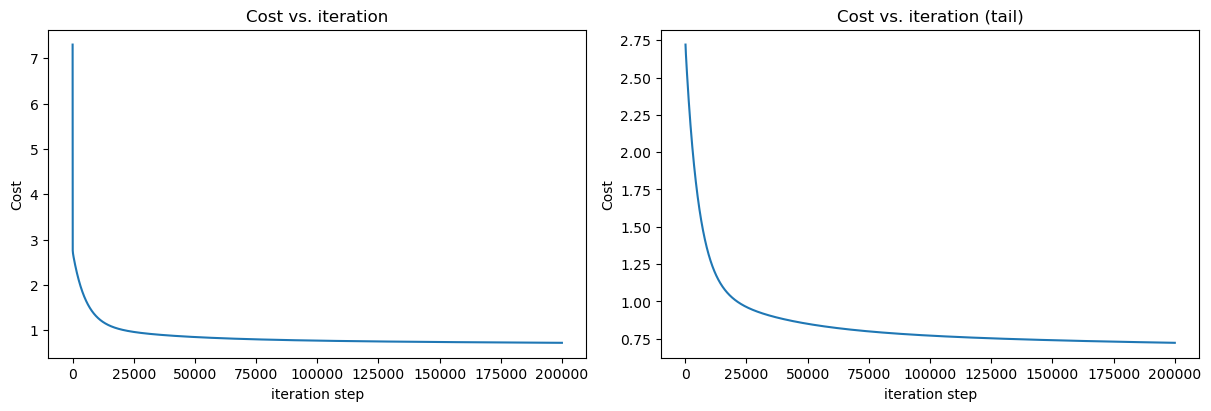

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

#### Scaled Data
We are going to used scaled data to find gradient descent

In [94]:
iterations = 1000
alpha = 5e-1
# run gradient descent 
scaled_w_final, scaled_b_final, scaled_J_hist = gradient_descent(X_scaled, y_train, weights, bias, compute_cost, compute_gradient, 
                                                    alpha, iterations)

Iteration    0: Cost     1.20   
Iteration  100: Cost     0.67   
Iteration  200: Cost     0.67   
Iteration  300: Cost     0.67   
Iteration  400: Cost     0.67   
Iteration  500: Cost     0.67   
Iteration  600: Cost     0.67   
Iteration  700: Cost     0.67   
Iteration  800: Cost     0.67   
Iteration  900: Cost     0.67   


In [47]:
print(f"Final cost is: {scaled_J_hist[-1]:.4f}")

Final cost is: 0.6679


In [48]:
print(f"b,w found by gradient descent: {scaled_b_final:0.2f},{scaled_w_final} ")
m,_ = x_train.shape
for i in range(16):
    print(f"prediction: {np.dot(X_scaled[i], scaled_w_final) + scaled_b_final:0.2f}, target value: {y_train.iloc[i]}")

b,w found by gradient descent: 4.01,[ 1.78032014e+00  1.37852439e-01  5.68270110e-02  1.05217418e-01
  7.61728677e-02  1.42072936e-01  3.33948912e-01  8.11920060e-02
  1.33458407e-01  4.63122647e-02  6.51931623e-02  3.39015670e-01
  2.63891752e-02  1.30791599e-01 -6.48451614e-03 -1.08653751e-03
  1.01083439e-01  3.19467680e-03 -1.21134477e-03  9.88754216e-04
 -1.36133699e-02  9.14181796e-05  3.32665783e-02  1.57897301e-03
  2.36934677e-01  1.95915310e-01  3.72577934e-01] 
prediction: 6.94, target value: 7
prediction: 3.10, target value: 4
prediction: 1.89, target value: 1
prediction: 3.45, target value: 3
prediction: 1.89, target value: 1
prediction: 4.16, target value: 6
prediction: 5.35, target value: 5
prediction: 2.24, target value: 4
prediction: 8.09, target value: 6
prediction: 4.19, target value: 6
prediction: 1.92, target value: 3
prediction: 1.83, target value: 1
prediction: 7.65, target value: 8
prediction: 6.52, target value: 6
prediction: 5.75, target value: 6
prediction: 6

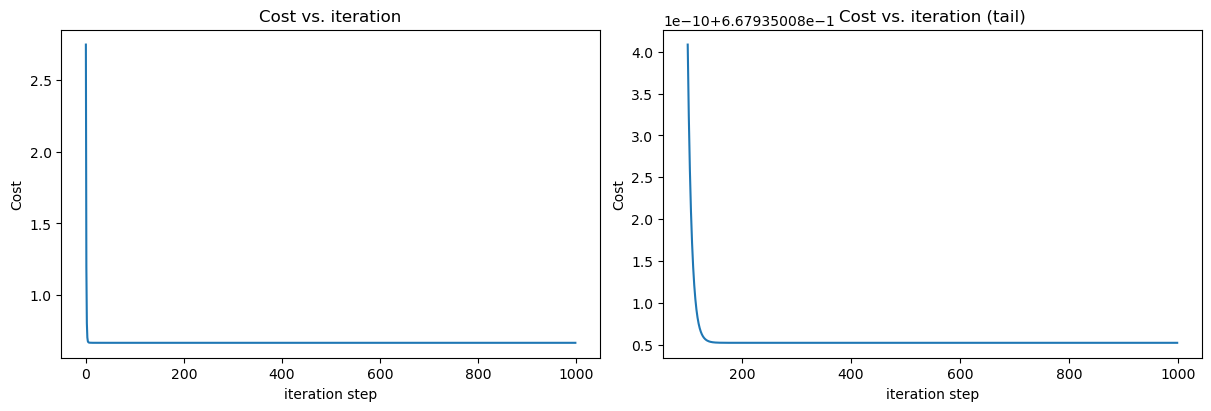

In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(scaled_J_hist)
ax2.plot(100 + np.arange(len(scaled_J_hist[100:])), scaled_J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

#### Difference in convergence rates between scaled and unscaled data

<ul>
    <li>We can see that the version where we have used scaled data converged almost just after few hundred iterations, whereas the version where we used unscaled data still did not converge converge to the global minima even after 200 thousand iterations.</li>
    <li>It should also be noted that the final alpha value is chosen after trying many different values.</li>
</ul>

### Gradient descent with non-0 weights vector and bias 

<ul>
    <li>Instead of starting with a zero weight vector, we are going to initialize them with small random weights. This would be ideal, because if we initialize the weights to 0s, all the weights update identically and hence we can see the predictions above are within a specific range between 3 and 4.5.</li>
    <li>Also intializing bias to the mean of y would help in faster convergence and also would avoid large initial errors (if y values are large).</li>
</ul>

In [50]:
weights = np.random.randn(X_scaled.shape[1]) * 0.01  # Small random values
bias = np.mean(y_train)

### Non-scaled Data

So let us first try with the non-scaled data and see if the change in weights and bias values has any change at all on the convergence.

In [51]:
iterations = 20000
alpha = 4e-5
# run gradient descent 
nonzero_w_final, nonzero_b_final, nonzero_J_hist = gradient_descent(x_train, y_train, weights, bias, compute_cost, compute_gradient, 
                                                    alpha, iterations)

Iteration    0: Cost     4.71   
Iteration 2000: Cost     2.20   
Iteration 4000: Cost     1.84   
Iteration 6000: Cost     1.59   
Iteration 8000: Cost     1.41   
Iteration 10000: Cost     1.28   
Iteration 12000: Cost     1.19   
Iteration 14000: Cost     1.13   
Iteration 16000: Cost     1.08   
Iteration 18000: Cost     1.04   


In [52]:
print(f"Final cost is: {nonzero_J_hist[-1]:.4f}")

Final cost is: 1.0098


In [53]:
print(f"b,w found by gradient descent: {nonzero_b_final:0.2f},{nonzero_w_final} ")
m,_ = x_train.shape
for i in range(16):
    print(f"prediction: {np.dot(x_train.iloc[i], nonzero_w_final) + nonzero_b_final:0.2f}, target value: {y_train.iloc[i]}")

b,w found by gradient descent: 4.01,[ 9.78815603e-01  3.94691482e-02  3.56822184e-02  8.40819418e-02
  3.91283357e-02  6.66971580e-02  1.91270870e-01  3.97253682e-02
  4.97721151e-02  1.23511667e-03  5.21953726e-02  9.76001651e-02
 -5.32726001e-02  6.86466415e-03 -5.82983724e-03 -1.23834762e-04
  2.40802084e-02  4.28760146e-03 -3.34680566e-03  4.36893851e-04
 -1.75034893e-02  4.00627801e-03  4.98164716e-02 -1.51151905e-01
  3.75176604e-02  3.85426939e-02  2.18953010e-01] 
prediction: 6.11, target value: 7
prediction: 2.74, target value: 4
prediction: 2.61, target value: 1
prediction: 3.22, target value: 3
prediction: 2.79, target value: 1
prediction: 4.74, target value: 6
prediction: 5.57, target value: 5
prediction: 2.55, target value: 4
prediction: 5.26, target value: 6
prediction: 3.08, target value: 6
prediction: 3.08, target value: 3
prediction: 2.58, target value: 1
prediction: 7.66, target value: 8
prediction: 6.72, target value: 6
prediction: 5.16, target value: 6
prediction: 6

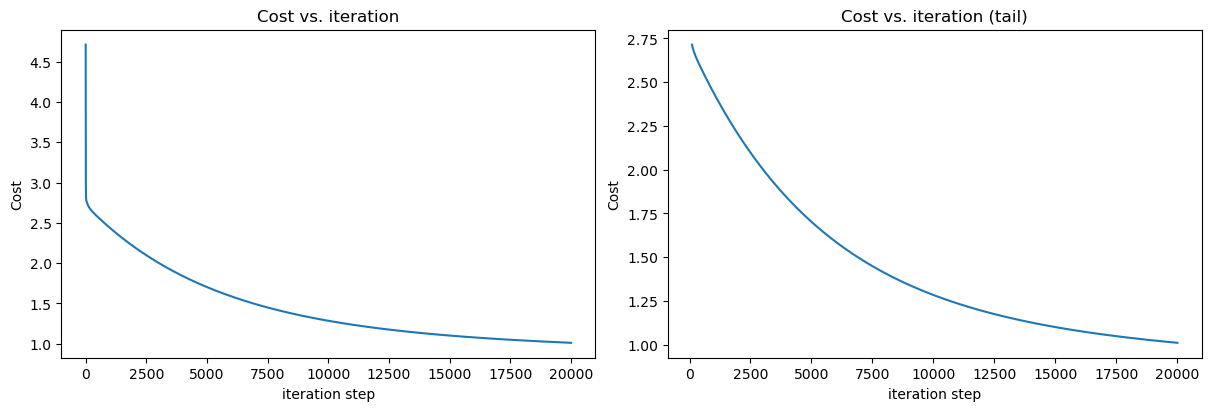

In [54]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(nonzero_J_hist)
ax2.plot(100 + np.arange(len(nonzero_J_hist[100:])), nonzero_J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

<b>Why is the cost at the end of 200k iterations similar when the starting points are different?</b>

In both the unscaled data gradient descents, the starting points are different ( different weights and bias values ). <b>Since linear regression uses a convex cost function, irrespective of the starting point, the cost gradient descent has to converge to the same point and hence travel toward the global minima, but the number of iterations taken to reach it can vary.</b>

### Scaled Data

In the below palette, we can see that we used scaled version of the features <b>X_scaled</b> instead of <b>x_train</b>.

In [55]:
iterations = 2000
alpha = 5e-1
# run gradient descent 
nonzero_scaled_w_final, nonzero_scaled_b_final, nonzero_scaled_J_hist = gradient_descent(X_scaled, y_train, weights, bias, compute_cost, compute_gradient, 
                                                    alpha, iterations)

Iteration    0: Cost     1.20   
Iteration  200: Cost     0.67   
Iteration  400: Cost     0.67   
Iteration  600: Cost     0.67   
Iteration  800: Cost     0.67   
Iteration 1000: Cost     0.67   
Iteration 1200: Cost     0.67   
Iteration 1400: Cost     0.67   
Iteration 1600: Cost     0.67   
Iteration 1800: Cost     0.67   


In [56]:
print(f"b,w found by gradient descent: {nonzero_scaled_b_final:0.2f},{nonzero_scaled_w_final} ")
m,_ = x_train.shape
for i in range(16):
    print(f"prediction: {np.dot(X_scaled[i], nonzero_scaled_w_final) + nonzero_scaled_b_final:0.2f}, target value: {y_train.iloc[i]}")

b,w found by gradient descent: 4.01,[ 1.78032014e+00  1.37852439e-01  5.68270110e-02  1.05217418e-01
  7.61728677e-02  1.42072936e-01  3.33948912e-01  8.11920060e-02
  1.33458407e-01  4.63122647e-02  6.51931623e-02  3.39015670e-01
  2.63891752e-02  1.30791599e-01 -6.48451614e-03 -1.08653751e-03
  1.01083439e-01  3.19467680e-03 -1.21134477e-03  9.88754216e-04
 -1.36133699e-02  9.14181796e-05  3.32665783e-02  1.57897301e-03
  2.36934677e-01  1.95915310e-01  3.72577934e-01] 
prediction: 6.94, target value: 7
prediction: 3.10, target value: 4
prediction: 1.89, target value: 1
prediction: 3.45, target value: 3
prediction: 1.89, target value: 1
prediction: 4.16, target value: 6
prediction: 5.35, target value: 5
prediction: 2.24, target value: 4
prediction: 8.09, target value: 6
prediction: 4.19, target value: 6
prediction: 1.92, target value: 3
prediction: 1.83, target value: 1
prediction: 7.65, target value: 8
prediction: 6.52, target value: 6
prediction: 5.75, target value: 6
prediction: 6

We can also see that our bias and weights are different from the previous gradient descent values.

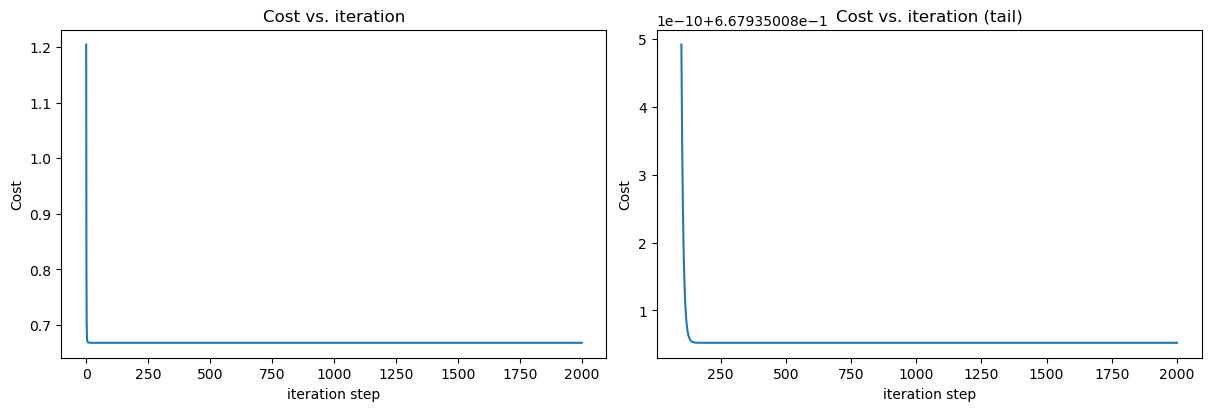

In [57]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(nonzero_scaled_J_hist)
ax2.plot(100 + np.arange(len(nonzero_scaled_J_hist[100:])), nonzero_scaled_J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

Based on the different weights and values we took, it looks like there is not much difference in the rate of convergence.

## Mean Squared Errors for our Models

In [58]:
from sklearn.metrics import mean_squared_error

### SkLearn Model Unscaled

#### MSE

In [59]:
unscaled_sk_mse = np.mean((lr_unscaled.predict(x_train) - y_train)**2)
print(f"Scikit-Learn's MSE: {unscaled_sk_mse:.4f}")

Scikit-Learn's MSE: 1.3359


#### R2 score for training data

In [60]:
lr_unscaled.score(x_train, y_train)

0.7611322693943474

In [61]:
lr_unscaled.score(x_test, y_test)

0.7634993373457422

### SkLearn Model Scaled

In [62]:
sk_mse = np.mean((lr.predict(X_scaled) - y_train)**2)
print(f"Scikit-Learn's MSE: {sk_mse:.4f}")

Scikit-Learn's MSE: 1.3359


#### R2 score for training data

In [63]:
lr.score(X_scaled, y_train)

0.7611322693943473

In [64]:
lr.score(test_scaled, y_test)

0.7634993373457424

### Unscaled zero weights and bias Model

#### MSE

In [65]:
y_pred_custom = x_train @ w_final + b_final
mse_custom = mean_squared_error(y_train, y_pred_custom)
mse_custom

1.445395432382791

#### R2 score for training data

In [66]:
from sklearn.metrics import r2_score

In [67]:
reshaped_y_pred_custom = y_pred_custom.to_numpy().flatten()  
reshaped_y_train = y_train.values.reshape(-1)  

r2_sklearn = r2_score(reshaped_y_train, reshaped_y_pred_custom)
r2_sklearn

0.7415479630511954

#### R2 score for testing data

In [68]:
y_test_pred_custom = x_test @ w_final + b_final

reshaped_y_test_pred_custom = y_test_pred_custom.to_numpy().flatten()  
reshaped_y_test = y_test.values.reshape(-1)  

r2_sklearn = r2_score(reshaped_y_test, reshaped_y_test_pred_custom)
r2_sklearn

0.7437277549553709

### Scaled zero weights and bias model

#### MSE

In [69]:
scaled_y_pred_custom = X_scaled @ scaled_w_final +scaled_b_final
scaled_mse_custom = mean_squared_error(y_train, scaled_y_pred_custom)
scaled_mse_custom

1.33587001610455

#### R2 score for training data

In [70]:
reshaped_scaled_y_pred_custom = scaled_y_pred_custom.flatten()  
reshaped_Scaled_y_train = y_train.values.reshape(-1)  

r2_sklearn = r2_score(reshaped_Scaled_y_train, reshaped_scaled_y_pred_custom)
r2_sklearn

0.7611322693943474

#### R2 score for testing data

In [71]:
y_test_scaled_pred_custom = test_scaled @ scaled_w_final + scaled_b_final

reshaped_y_test_scaled_pred_custom = y_test_scaled_pred_custom.flatten()  
reshaped_y_test = y_test.values.reshape(-1)  

r2_sklearn = r2_score(reshaped_y_test, reshaped_y_test_scaled_pred_custom)
r2_sklearn

0.7634993373457422

### Unscaled non-zero weights and bias Model

#### MSE

In [72]:
nonzero_y_pred_custom = x_train @ nonzero_w_final + nonzero_b_final
nonzero_mse_custom = mean_squared_error(y_train, nonzero_y_pred_custom)
nonzero_mse_custom

2.019684976969052

#### R2 score for training data

In [73]:
reshaped_nonzero_y_pred_custom = nonzero_y_pred_custom.to_numpy().flatten()  
reshaped_nonzero_y_train = y_train.values.reshape(-1)  

r2_sklearn = r2_score(reshaped_nonzero_y_train, reshaped_nonzero_y_pred_custom)
r2_sklearn

0.6388589000644431

#### R2 score for testing data

In [74]:
nonzero_y_test_pred_custom = x_test @ nonzero_w_final + nonzero_b_final

reshaped_nonzero_y_test_pred_custom = nonzero_y_test_pred_custom.to_numpy().flatten()  
reshaped_nonzero_y_test = y_test.values.reshape(-1)  

r2_sklearn = r2_score(reshaped_nonzero_y_test, reshaped_nonzero_y_test_pred_custom)
r2_sklearn

0.6418789747280393

### Scaled non-zero weights and bias Model

#### MSE

In [75]:
nonzero_scaled_y_pred_custom = X_scaled @ nonzero_scaled_w_final + nonzero_scaled_b_final
nonzero_scaled_mse_custom = mean_squared_error(y_train, nonzero_scaled_y_pred_custom)
nonzero_scaled_mse_custom

1.33587001610455

#### R2 score for training data

In [76]:
reshaped_nonzero_scaled_y_pred_custom = nonzero_scaled_y_pred_custom.flatten()  
reshaped_nonzero_scaled_y_train = y_train.values.reshape(-1)  

r2_sklearn = r2_score(reshaped_nonzero_scaled_y_train, reshaped_nonzero_scaled_y_pred_custom)
r2_sklearn

0.7611322693943474

#### R2 score for testing data

In [77]:
y_test_nonzero_scaled_pred_custom = test_scaled @ nonzero_scaled_w_final + nonzero_scaled_b_final

reshaped_y_test_nonzero_scaled_pred_custom = y_test_nonzero_scaled_pred_custom.flatten()  
reshaped_nonzero_scaled_y_test = y_test.values.reshape(-1)  

r2_sklearn = r2_score(reshaped_nonzero_scaled_y_test, reshaped_y_test_nonzero_scaled_pred_custom)
r2_sklearn

0.7634993373457422

### MSE values observations

<ul>
    <li>We can clearly observe that our scaled models have an MSE on par with the sklearn model, since their gradient descent converged to the minima</li>
    <li>It can also be noted that our non-scaled models MSE is also very close to the sklearn model. Since our unscaled model's gradient did not converge to the minima their MSE is slightly greater that that of the models, whose gradient descent is fully converged</li>

### R2 value observations

<ul>
    <li>The R2 values for scaled models is better than that of un-scaled models, which is obviously because of the convergence in gradient descent</li>
    <li> We can also see that Testing R2 is better than that of Training R2 irrespective of the type of data (scaled or unscaled) used for the model. This indicates that all our models perform slightly better in real world compare to our training data</li>
</ul>

## Regularization

<ul>
    <li>
        Regularized linear regression is just an addition to linear regression, which adds a penalty term to the    cost function to discourage large model co-efficents and reduce overfitting.
    </li>
    <li>
        Regularized linear regression is generally used, when there is a risk of overfitting, meaning in cases when we have a lot of features, highly co-related features, noisy data (stock market data), or a small dataset compare to the number of features.
    </li>
</ul>
    


#### Scaled Data

In [95]:
iterations = 1000
alpha = 5e-1
lambda_ = 0.1
# run gradient descent 
regscaled_w_final, regscaled_b_final, regscaled_J_hist = regularized_gradient_descent(X_scaled, y_train, weights, bias, compute_cost, compute_regularized_gradient, 
                                                    alpha, lambda_, iterations)

Iteration    0: Cost     1.20   
Iteration  100: Cost     0.67   
Iteration  200: Cost     0.67   
Iteration  300: Cost     0.67   
Iteration  400: Cost     0.67   
Iteration  500: Cost     0.67   
Iteration  600: Cost     0.67   
Iteration  700: Cost     0.67   
Iteration  800: Cost     0.67   
Iteration  900: Cost     0.67   


#### MSE

In [97]:
regscaled_y_pred_custom = X_scaled @ regscaled_w_final +regscaled_b_final
regscaled_mse_custom = mean_squared_error(y_train, regscaled_y_pred_custom)
scaled_mse_custom

1.33587001610455

#### R2 score for training data

In [98]:
reshaped_regscaled_y_pred_custom = regscaled_y_pred_custom.flatten()  
reshaped_regScaled_y_train = y_train.values.reshape(-1)  

r2_sklearn = r2_score(reshaped_regScaled_y_train, reshaped_regscaled_y_pred_custom)
r2_sklearn

0.7611322693900604

#### R2 score for testing data

In [99]:
y_test_regscaled_pred_custom = test_scaled @ regscaled_w_final + regscaled_b_final

reshaped_y_test_regscaled_pred_custom = y_test_regscaled_pred_custom.flatten()  
reshaped_y_test = y_test.values.reshape(-1)  

r2_sklearn = r2_score(reshaped_y_test, reshaped_y_test_regscaled_pred_custom)
r2_sklearn

0.7634993684405338

#### Un-scaled data

In [103]:
iterations = 200000
alpha = 4e-5
lambda_ = 0.1
# run gradient descent 
reg_w_final, reg_b_final, reg_J_hist = regularized_gradient_descent(x_train, y_train, weights, bias, compute_cost, compute_regularized_gradient, 
                                                    alpha, lambda_, iterations)

Iteration    0: Cost     4.71   
Iteration 20000: Cost     1.01   
Iteration 40000: Cost     0.88   
Iteration 60000: Cost     0.82   
Iteration 80000: Cost     0.79   
Iteration 100000: Cost     0.77   
Iteration 120000: Cost     0.75   
Iteration 140000: Cost     0.74   
Iteration 160000: Cost     0.74   
Iteration 180000: Cost     0.73   


#### MSE

In [107]:
reg_y_pred_custom = x_train @ reg_w_final + reg_b_final
mse_custom = mean_squared_error(y_train, reg_y_pred_custom)
mse_custom

1.4442990060252106

#### R2 score for training data

In [110]:
reshaped_reg_y_pred_custom = reg_y_pred_custom.to_numpy().flatten()  
reshaped_y_train = y_train.values.reshape(-1)  

r2_sklearn = r2_score(reshaped_y_train, reshaped_reg_y_pred_custom)
r2_sklearn

0.7417440157154922

#### R2 score for testing data

In [111]:
reg_y_test_pred_custom = x_test @ w_final + b_final

reshaped_reg_y_test_pred_custom = reg_y_test_pred_custom.to_numpy().flatten()  
reshaped_y_test = y_test.values.reshape(-1)  

r2_sklearn = r2_score(reshaped_y_test, reshaped_reg_y_test_pred_custom)
r2_sklearn

0.7437277549553709

### Observations for Regularized Linear Regression

<ul>
    <li>We can observe that there is no change in the Mean Squared Error, training score and testing score for both the scaled and unscaled models</li>
    <li>The reason our models scores haven't improved or for that reason decreased, is that as we discussed, Regularization is used only when there is a reason to believe that our model is going to be overfit. In our case, the criteria discussed for overfit does not apply to our data and hence Regularization has no effect on our models.</li>
</ul>